## Problem Statement
To predict which individuals are most likely to have or use a bank account based on demographic information and financial service usage data from approximately 33,600 individuals across East Africa.

### Objective
- Develop a Machine Learning model to predict which individuals are most likely to have or use a bank account.
- Evaluate the model's performance using relevant evaluation metrics

#### Data Features: country, year, uniqueid, location_type, cellphone_access, household_size, age_of_respondent,gender_of_respondent, relationship_with_head, marital_status, education_level, and job_type.


In [2]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [3]:
# Import the data
Africa_Financial_Inclusion_Data = pd.read_csv("c:\\Users\\HP\\Documents\\STUDY\\DATA SCIENCE AND ANALYSIS - GOMYCODE\\Data Sets\\Financial_inclusion_dataset.csv")
Africa_Financial_Inclusion_Data.tail(10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,6,24,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,6,16,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,3,35,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,9,16,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,9,20,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [4]:
# Determine the features of the data:
Africa_Financial_Inclusion_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [5]:
# Determine the properties of the data:
Africa_Financial_Inclusion_Data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [6]:
# Determine the missing values of the data:
Africa_Financial_Inclusion_Data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
# Count duplicate rows
duplicate_count = Africa_Financial_Inclusion_Data.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicate_count}")



Total Duplicate Rows: 0


In [8]:
# Check for invalid or inconsistent values (negative values in positive-only columns)
for col in Africa_Financial_Inclusion_Data.columns:
    if Africa_Financial_Inclusion_Data[col].dtype in ['int64', 'float64']: 
        if Africa_Financial_Inclusion_Data[col].min() < 0:
            print(f"Negative values found in column {col}")
    elif Africa_Financial_Inclusion_Data[col].dtype == 'object':  
        if Africa_Financial_Inclusion_Data[col].nunique() > 10: 
            print(f"High cardinality in column {col}")

High cardinality in column uniqueid


In [9]:
# Data Preprocessing

# activate the file on the ydata profile
from ydata_profiling import ProfileReport

# Generate the profile report
Africa_Financial_Inclusion_Data_Profile = ProfileReport(Africa_Financial_Inclusion_Data, title = "Africa Financial Inclusion Data Analysis")
Africa_Financial_Inclusion_Data_Profile.to_notebook_iframe()
Africa_Financial_Inclusion_Data_Profile.to_file("Africa Financial Inclusion Data Analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
"""Encoding columns with categorical data"""
le = LabelEncoder()

# List of categorical columns to encode with LabelEncoder
categorical_cols = ['country', 'uniqueid', 'location_type', 'bank_account', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']

# Apply LabelEncoder to each column
for col in categorical_cols:
    Africa_Financial_Inclusion_Data[col] = le.fit_transform(Africa_Financial_Inclusion_Data[col])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{label}: {code}")
    print() 

Column: country
Kenya: 0
Rwanda: 1
Tanzania: 2
Uganda: 3

Column: uniqueid
uniqueid_1: 0
uniqueid_10: 1
uniqueid_100: 2
uniqueid_1000: 3
uniqueid_1001: 4
uniqueid_1002: 5
uniqueid_1003: 6
uniqueid_1004: 7
uniqueid_1005: 8
uniqueid_1006: 9
uniqueid_1007: 10
uniqueid_1008: 11
uniqueid_1009: 12
uniqueid_101: 13
uniqueid_1010: 14
uniqueid_1011: 15
uniqueid_1012: 16
uniqueid_1013: 17
uniqueid_1014: 18
uniqueid_1015: 19
uniqueid_1016: 20
uniqueid_1017: 21
uniqueid_1018: 22
uniqueid_1019: 23
uniqueid_102: 24
uniqueid_1020: 25
uniqueid_1021: 26
uniqueid_1022: 27
uniqueid_1023: 28
uniqueid_1024: 29
uniqueid_1025: 30
uniqueid_1026: 31
uniqueid_1027: 32
uniqueid_1028: 33
uniqueid_1029: 34
uniqueid_103: 35
uniqueid_1030: 36
uniqueid_1031: 37
uniqueid_1032: 38
uniqueid_1033: 39
uniqueid_1034: 40
uniqueid_1035: 41
uniqueid_1036: 42
uniqueid_1037: 43
uniqueid_1038: 44
uniqueid_1039: 45
uniqueid_104: 46
uniqueid_1040: 47
uniqueid_1041: 48
uniqueid_1042: 49
uniqueid_1043: 50
uniqueid_1044: 51
uniqueid_

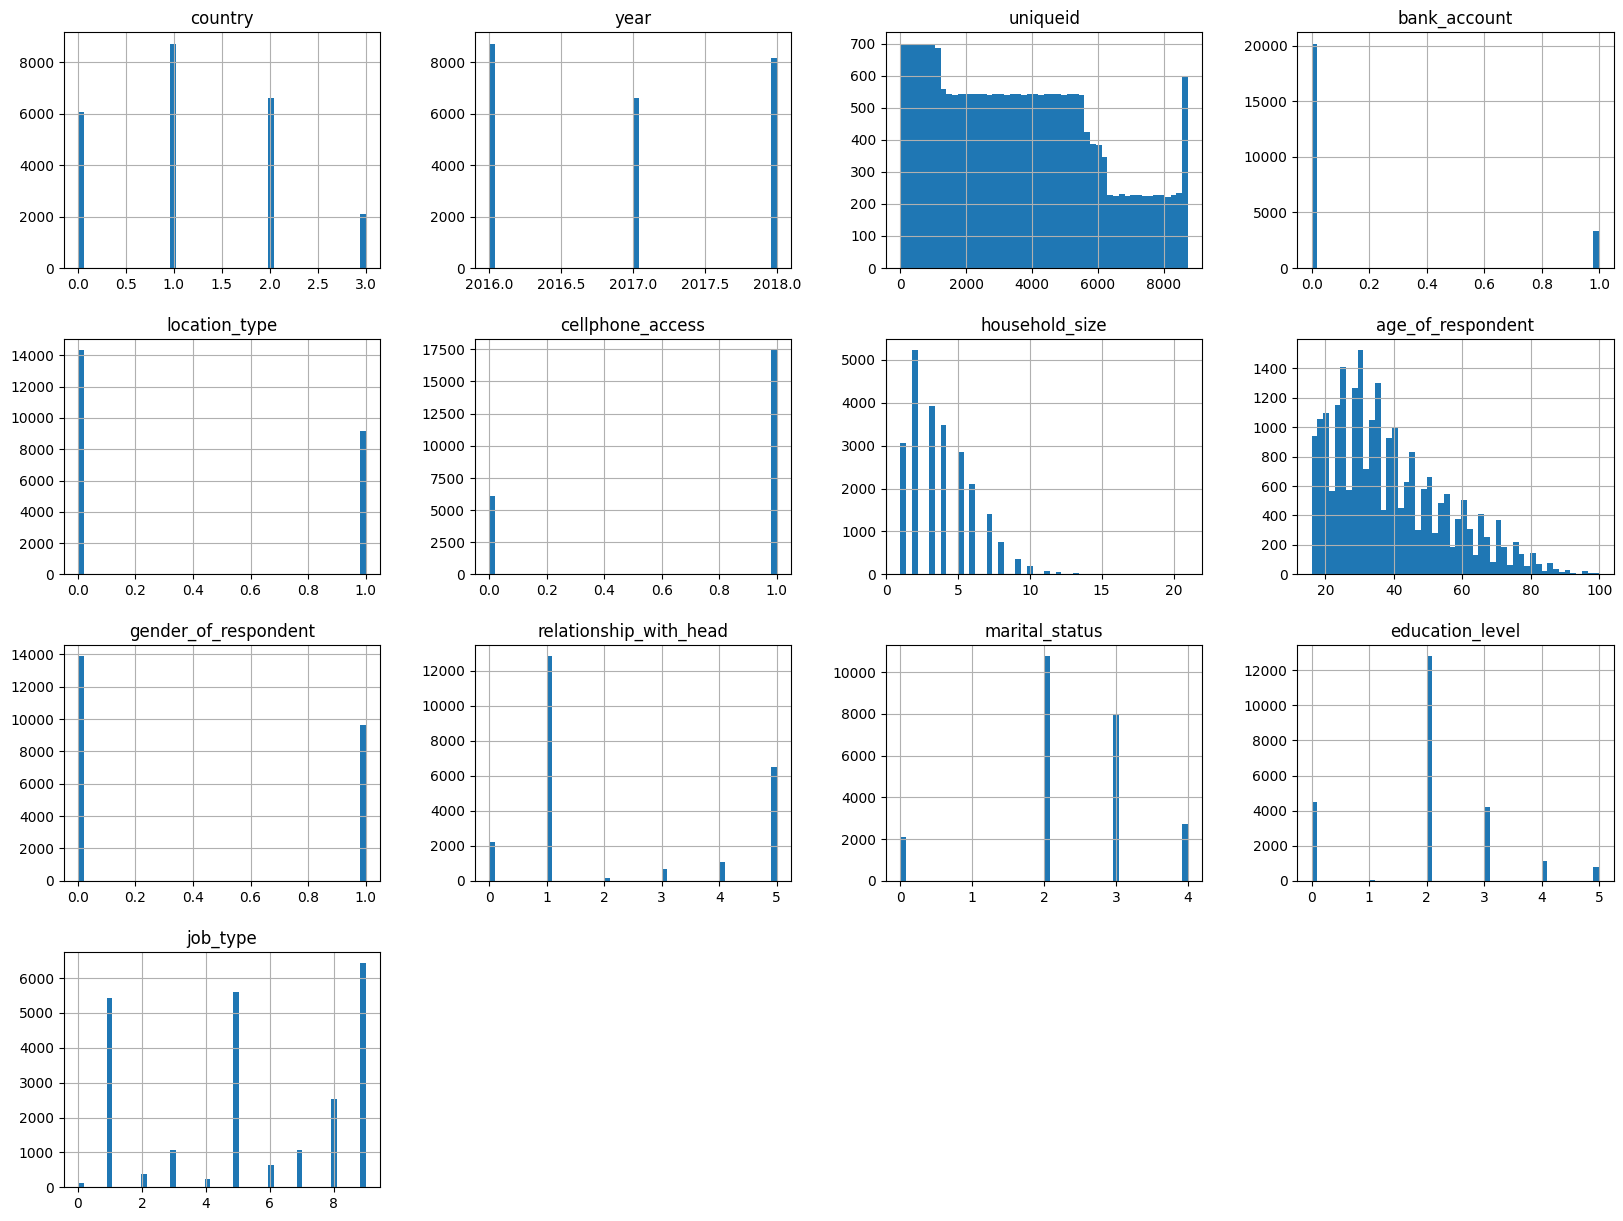

<Figure size 640x480 with 0 Axes>

In [11]:
# Visualize distributions (histograms or density plots)
Africa_Financial_Inclusion_Data.hist(bins=50, figsize=(20, 15))
plt.title('Africa Financial Inclusion Data Distribution')
plt.show()
plt.savefig('Africa Financial Inclusion Data Distribution.png')


In [12]:
# Determine the key features using Correlation Analysis,
corr_matrix = Africa_Financial_Inclusion_Data.corr()
print(corr_matrix)

                         country      year  uniqueid  bank_account  \
country                 1.000000 -0.094991 -0.054307     -0.161362   
year                   -0.094991  1.000000 -0.238110      0.112318   
uniqueid               -0.054307 -0.238110  1.000000     -0.022321   
bank_account           -0.161362  0.112318 -0.022321      1.000000   
location_type           0.152285  0.214621 -0.075252      0.087288   
cellphone_access       -0.150003 -0.066505  0.028067      0.209669   
household_size         -0.119158 -0.052264  0.022229     -0.028326   
age_of_respondent      -0.058778 -0.019330  0.014326      0.019429   
gender_of_respondent   -0.027055  0.000317  0.003552      0.117234   
relationship_with_head  0.130408  0.001801 -0.014321     -0.070853   
marital_status          0.009282 -0.026187  0.005249     -0.038739   
education_level        -0.050706  0.173869 -0.049955      0.323768   
job_type                0.381066  0.266323 -0.104799     -0.064171   

                   

The correlation matrix of the African Financial Inclusion data shows that are mostly weak relationships between he variables indicating that there are no strong linear relationships between these variables except for country and year variables which are perfectly correlated with (1.000), suggesting that the data might be from a specific year for each country.

Weak Correlations
- education_level and bank_account (0.388): Individuals with higher education levels are more likely to have a bank account.
- job_type and country (0.451): Certain job types are more prevalent in specific countries.
- age_of_respondent and bank_account (0.110): Older individuals are slightly more likely to have a bank account.
- cellphone_access and bank_account (0.209): Individuals with access to a cellphone are more likely to have a bank account.
- education_level and age_of_respondent (0.190): Older individuals tend to have higher education levels.

Negative Correlations
- household_size and age_of_respondent (-0.107): Larger households tend to have younger individuals.


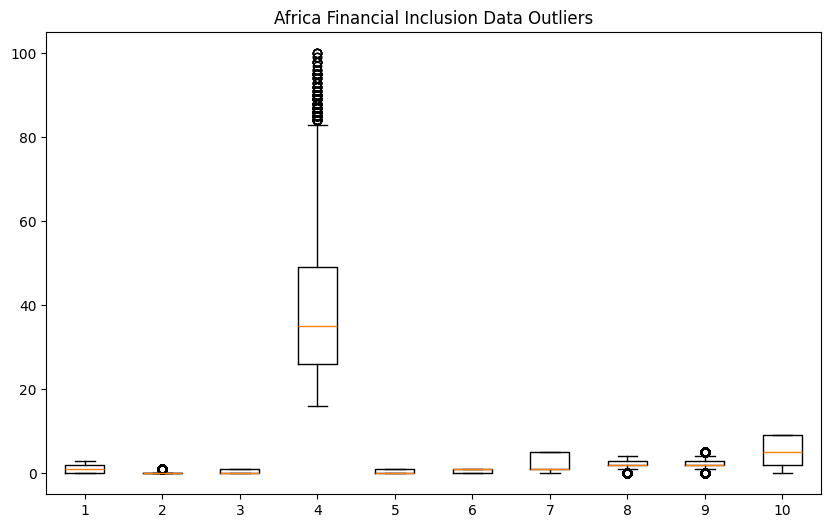

In [13]:
# Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(Africa_Financial_Inclusion_Data[['country', 'bank_account', 'location_type', 'age_of_respondent', 
                                                    'gender_of_respondent', 'cellphone_access', 'relationship_with_head', 
                                                    'marital_status', 'education_level', 'job_type']].values)
plt.title('Africa Financial Inclusion Data Outliers')
plt.savefig('African_Financial_Inclusion_Boxplot.png')


In [14]:
# splitting the dataset for testing and training

# Features and labels
X = Africa_Financial_Inclusion_Data.drop(columns=['bank_account'])
y = Africa_Financial_Inclusion_Data['bank_account']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
X_train.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
12033,1,2016,5518,1,1,7,18,0,2,3,2,5
11888,1,2016,5358,0,1,3,49,0,5,2,3,5
20909,2,2017,5676,1,1,2,41,1,1,3,2,5
22785,3,2018,405,0,0,5,25,0,5,2,2,7
14323,1,2016,8063,0,1,7,46,1,1,2,2,5


In [16]:
# Using Decision Tree Algorithm,
DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train, y_train)
DTprediction = DTmodel.predict(X_test)
print(DTprediction)

[0 0 0 ... 0 0 1]


In [17]:
# Using key metrics to evaluate the suitbility of the Decision Tree model
print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, DTprediction))
print("Classification Report:")
print(classification_report(y_test, DTprediction))
print("Confusion Matrix:")
print(confusion_matrix(y_test, DTprediction))


Decision Tree Classifier:
Accuracy: 0.8240170031880978
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4063
           1       0.37      0.40      0.38       642

    accuracy                           0.82      4705
   macro avg       0.64      0.65      0.64      4705
weighted avg       0.83      0.82      0.83      4705

Confusion Matrix:
[[3618  445]
 [ 383  259]]


In [18]:
# Using Random Forest Classifier Algorithm,
RFCmodel = RandomForestClassifier()
RFCmodel.fit(X_train, y_train)
RFCprediction = RFCmodel.predict(X_test)
print(RFCprediction)

[0 0 0 ... 0 0 0]


In [19]:
# Using key metrics to evaluate the suitbility of the Random Forest Classifier model
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, RFCprediction))
print("Classification Report:")
print(classification_report(y_test, RFCprediction))
print("Confusion Matrix:")
print(confusion_matrix(y_test, RFCprediction))


Random Forest Classifier:
Accuracy: 0.8843783209351753
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4063
           1       0.63      0.36      0.46       642

    accuracy                           0.88      4705
   macro avg       0.77      0.67      0.70      4705
weighted avg       0.87      0.88      0.87      4705

Confusion Matrix:
[[3927  136]
 [ 408  234]]


In [20]:
# Using Gradient Boosting Classifier Algorithm,
GBCmodel = GradientBoostingClassifier()
GBCmodel.fit(X_train, y_train)
GBCprediction = GBCmodel.predict(X_test)
print(GBCprediction)

[0 0 0 ... 0 0 0]


In [21]:
# Using key metrics to evaluate the suitability of the Gradient Boosting Classifier Algorithm model
print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, GBCprediction))
print("Classification Report:")
print(classification_report(y_test, GBCprediction))
print("Confusion Matrix:")
print(confusion_matrix(y_test, GBCprediction))


Gradient Boosting Classifier:
Accuracy: 0.8928799149840595
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4063
           1       0.72      0.35      0.47       642

    accuracy                           0.89      4705
   macro avg       0.81      0.66      0.70      4705
weighted avg       0.88      0.89      0.88      4705

Confusion Matrix:
[[3978   85]
 [ 419  223]]


In [22]:
# Save the best performing model
import pickle

filename = 'gradient_boosting_model.pkl'
def save_model(GBCmodel, filename):
    """Save the trained model to a file"""
    with open(filename, 'wb') as file:
        pickle.dump(GBCmodel, file)
def load_model(filename):
    """Load a trained model from a file"""
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Call the save_model function
save_model(GBCmodel,filename)